# IMPORTING ALL THE RELEVANT FILES & CLEANING DATA

## Here we import relevant files. Some of the basic EDA & Cleaning data that we perform here are
### 1) We are going to import the file as io_liq & after initial cleaning use liq_data for further analysis

- Drop NA values
- Remove \$ sign from all columns containing $
- We calculate profit
- Convert all city/county names to Uppercase (to avoid case conflicts)
- Fix date time & add column for year & quarter (for future sorting)
- Fix GUTTENBERG & GUTTENBURG.

In [1]:
%%time
# Importing all the necessary libraries for this project.

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import datetime
import datetime as dt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import statsmodels.api as sm
from sklearn import metrics
from pandas.core import datetools

# Time to Import the CSV & convert it into a DataFrame

#io_liq = pd.read_csv("Iowa_Liquor_sales_sample_10pct.csv", error_bad_lines=False)   #INITIAL MODEL BUILT ON THIS

io_liq = pd.read_csv("iowa_liquor_sales_proj_2.csv", error_bad_lines=False, low_memory=False)
io_liq = io_liq.drop(["Invoice/Item Number", "Address", "Store Location", "Pack", "Vendor Name", "Store Name"], axis = 1, errors = "Ignore")

#Remove all Rows with data with Null/NA values. This will help us work with numbers.

io_liq = io_liq.dropna(axis = 0)


#Remove the $ and convert to Floats to give capability of adding/subtracting. Here we are removing Char#1 
def remove_dollar(x):
    return float(x.replace('$', ''))

io_liq["Bottle Cost_Dollars"] = io_liq["State Bottle Cost"].apply(remove_dollar)
io_liq["Bottle Retail_Dollars"] = io_liq["State Bottle Retail"].apply(remove_dollar)
io_liq["Sale_Dollars"] = io_liq["Sale (Dollars)"].apply(remove_dollar)

##io_liq["Sale_Dollars"] = io_liq["Sale (Dollars)"].apply(lambda x: float(x[1:])) <-- lambda way of doing it 

#Calculate the Profit here
io_liq["Profit_Dollars"] = (io_liq["Bottle Retail_Dollars"] - io_liq["Bottle Cost_Dollars"])*io_liq["Bottles Sold"]


#FIX City Names

io_liq["CityName"] = io_liq["City"].apply(lambda x: x.upper())
io_liq["CountyName"] = io_liq["County"].apply(lambda x: x.upper())


# Fix the column date types

io_liq["Date"] = pd.to_datetime(io_liq["Date"], format="%m/%d/%Y", errors = "ignore")
io_liq["Year"] = io_liq["Date"].dt.year.astype(str)
# io_liq["Month"] = io_liq["Date"].dt.month.astype(str)


def ceiling_quarter(x):
    return str(math.ceil(x))
    
    
io_liq["Q#"] = (io_liq["Date"].dt.month/3)
io_liq['Quarter'] = io_liq['Q#'].apply(ceiling_quarter)



#Remove Repeat Columns here
liq_data = io_liq.drop(["State Bottle Cost", "State Bottle Retail", "Sale (Dollars)", "City", "County", "Q#"], axis = 1)

# Fix County#
liq_data["County Number"] = liq_data["County Number"].astype(int)
liq_data["Category"] = liq_data["Category"].astype(int)

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


FileNotFoundError: File b'iowa_liquor_sales_proj_2.csv' does not exist

In [696]:
# Let us understand the datatypes, the column types and other basic information about the table

liq_data.dtypes

Date                     datetime64[ns]
Store Number                      int64
Zip Code                         object
County Number                     int64
Category                          int64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)                int64
Bottles Sold                      int64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
Bottle Cost_Dollars             float64
Bottle Retail_Dollars           float64
Sale_Dollars                    float64
Profit_Dollars                  float64
CityName                         object
CountyName                       object
Year                             object
Quarter                          object
dtype: object

In [4]:
liq_data.shape

(2692602, 21)

In [5]:
#City has some spelling mistakes. Let us group store numbers and cities together and find all duplicate store numbers once unique
#The same store cannot be in two cities @ the same time

#Thank you Chris Albon - https://chrisalbon.com/python/pandas_delete_duplicates.html

clean_city = liq_data[["CityName", "Store Number"]].sort_values("Store Number")
cleaner_city = clean_city.drop_duplicates()

cleaner_city[cleaner_city["Store Number"].duplicated()] #THIS SPITS OUT 3782 telling it is duplicated

clean_city[clean_city["Store Number"]==3782]

# ##GUTTENBURG needs some fixing

# # FIX City Name




,CityName,Store Number
873902,GUTTENBURG,3782
2555021,GUTTENBERG,3782
2555005,GUTTENBERG,3782
2347852,GUTTENBERG,3782
1026592,GUTTENBURG,3782
2555020,GUTTENBERG,3782
2189115,GUTTENBERG,3782
363482,GUTTENBURG,3782
2345346,GUTTENBERG,3782
2394677,GUTTENBERG,3782


In [5]:
liq_data["CityName"] = liq_data["CityName"].replace("GUTTENBURG", "GUTTENBERG")

In [543]:
liq_data.shape

(2692602, 21)

In [7]:
#Testing some sorting techniques

liq_data[(liq_data["CityName"] == "GUTTENBERG") & (liq_data["Category Name"] == "VODKA 80 PROOF") & (liq_data["Bottle Cost_Dollars"]==9.25)]

,Date,Store Number,Zip Code,County Number,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),...,Volume Sold (Liters),Volume Sold (Gallons),Bottle Cost_Dollars,Bottle Retail_Dollars,Sale_Dollars,Profit_Dollars,CityName,CountyName,Year,Quarter
308651,2015-06-15,4869,52052,22,1031080,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,...,1.0,0.26,9.25,13.88,13.88,4.63,GUTTENBERG,CLAYTON,2015,2
324538,2015-07-27,4869,52052,22,1031080,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,...,1.0,0.26,9.25,13.88,13.88,4.63,GUTTENBERG,CLAYTON,2015,3
427312,2015-07-20,4672,52052,22,1031080,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,...,6.0,1.59,9.25,13.88,83.28,27.78,GUTTENBERG,CLAYTON,2015,3
431205,2015-03-02,3782,52052,22,1031080,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,...,2.0,0.53,9.25,13.88,27.76,9.26,GUTTENBERG,CLAYTON,2015,1
519133,2015-07-27,3782,52052,22,1031080,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,...,2.0,0.53,9.25,13.88,27.76,9.26,GUTTENBERG,CLAYTON,2015,3
889224,2015-09-28,3782,52052,22,1031080,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,...,6.0,1.59,9.25,13.88,83.28,27.78,GUTTENBERG,CLAYTON,2015,3
971393,2015-07-13,3782,52052,22,1031080,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,...,3.0,0.79,9.25,13.88,41.64,13.89,GUTTENBERG,CLAYTON,2015,3
1040015,2015-05-04,4869,52052,22,1031080,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,...,2.0,0.53,9.25,13.88,27.76,9.26,GUTTENBERG,CLAYTON,2015,2
1197058,2015-08-24,3782,52052,22,1031080,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,...,3.0,0.79,9.25,13.88,41.64,13.89,GUTTENBERG,CLAYTON,2015,3
1197490,2015-09-14,4869,52052,22,1031080,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,...,2.0,0.53,9.25,13.88,27.76,9.26,GUTTENBERG,CLAYTON,2015,3


In [8]:
def eda(dataframe):
    #EDA thanks to Ritika Bhasker
    
    print("missing values \n", dataframe.isnull().sum(), '\n')
    print("dataframe index \n", dataframe.index, '\n')
    print("dataframe types \n", dataframe.dtypes, '\n')
    print("dataframe shape \n", dataframe.shape, '\n')
    print("dataframe describe \n", dataframe.describe(include='all'), '\n')

eda(liq_data)

missing values 
 Date                     0
Store Number             0
Zip Code                 0
County Number            0
Category                 0
Category Name            0
Vendor Number            0
Item Number              0
Item Description         0
Bottle Volume (ml)       0
Bottles Sold             0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
Bottle Cost_Dollars      0
Bottle Retail_Dollars    0
Sale_Dollars             0
Profit_Dollars           0
CityName                 0
CountyName               0
Year                     0
Quarter                  0
dtype: int64 

dataframe index 
 Int64Index([      6,       8,      13,      18,      21,      25,      29,
                 38,      42,      50,
            ...
            2709542, 2709543, 2709544, 2709545, 2709546, 2709547, 2709548,
            2709549, 2709550, 2709551],
           dtype='int64', length=2692602) 

dataframe types 
 Date                     datetime64[ns]
Store Number                      in

In [698]:
liq_data.head(5)

,Date,Store Number,Zip Code,County Number,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),...,Volume Sold (Liters),Volume Sold (Gallons),Bottle Cost_Dollars,Bottle Retail_Dollars,Sale_Dollars,Profit_Dollars,CityName,CountyName,Year,Quarter
6,2015-11-09,2538,50702,7,1701100,DECANTERS & SPECIALTY PACKAGES,962,238,Forbidden Secret Coffee Pack,1500,...,9.0,2.38,11.62,17.43,104.58,34.86,WATERLOO,BLACK HAWK,2015,4
8,2015-11-30,2662,52761,70,1701100,DECANTERS & SPECIALTY PACKAGES,65,173,Laphroaig w/ Whiskey Stones,750,...,3.0,0.79,19.58,29.37,117.48,39.16,MUSCATINE,MUSCATINE,2015,4
13,2015-11-11,3650,51025,47,1701100,DECANTERS & SPECIALTY PACKAGES,962,238,Forbidden Secret Coffee Pack,1500,...,1.5,0.40,11.62,17.43,17.43,5.81,HOLSTEIN,IDA,2015,4
18,2015-11-18,3723,51040,67,1081200,CREAM LIQUEURS,305,258,"Rumchata ""GoChatas""",6000,...,6.0,1.59,99.00,148.50,148.50,49.50,ONAWA,MONONA,2015,4
21,2015-11-23,2642,50219,63,1701100,DECANTERS & SPECIALTY PACKAGES,962,238,Forbidden Secret Coffee Pack,1500,...,9.0,2.38,11.62,17.43,104.58,34.86,PELLA,MARION,2015,4


# SOME EXPLORATORY PLOTS TO UNDERSTAND DATA DISTRIBUTION

## These are not very important but helps me visualize the data & the how it is arranged. Plus it helps me get comfortable with data manipulation/sorting etc. :)

In [1]:
#Let us try to understand how are the sales distributed! What is the order of sales by category name? Top100 all time?

#EDA

rcParams['figure.figsize'] = 20, 10

plt.xticks(rotation=90)
category_plot = sns.countplot(x = "Category Name", data = liq_data, order = liq_data["Category Name"].value_counts().nlargest(100).index ,orient = "v")
plt.ylabel("COUNT OF SALES")
plt.title("COUNT OF SALES BY CATEGORY NAME")

plt.show()

# Hmmm...Vodka 80 Proof is the most common liquor sold.

NameError: name 'rcParams' is not defined

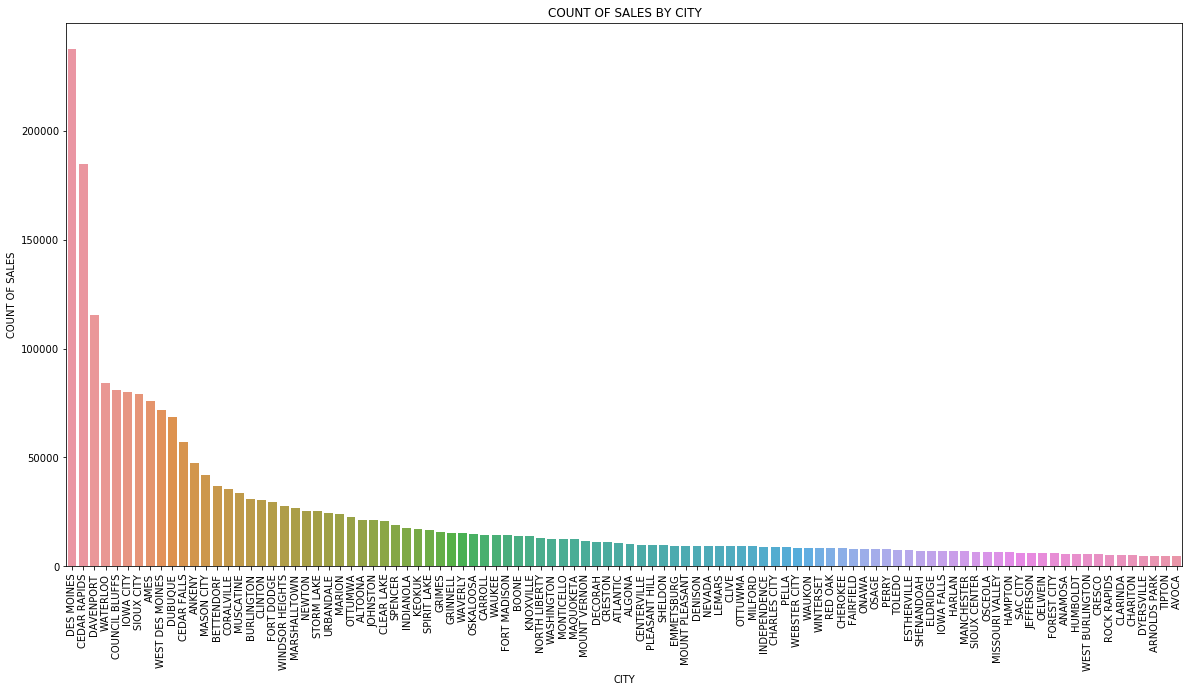

In [11]:
#Let us try to understand how are the sales distributed by city! What is the order of sales by City name?

#EDA

rcParams['figure.figsize'] = 20, 10

plt.xticks(rotation=90)
category_plot = sns.countplot(x = "CityName", data = liq_data, order = liq_data["CityName"].value_counts().nlargest(100).index ,orient = "v")
plt.ylabel("COUNT OF SALES")
plt.xlabel("CITY")
plt.title("COUNT OF SALES BY CITY")

plt.show()

# DesMoines has the most amount of liquor sold

# HERE WE WILL BE FINDING NUMBER OF STORES

# <span style="color:red">** I AM USING STORE #5205 as a sanity check for all groupbys statements</span>

### Number of stores/city. I split the task into two parts. First part was to get a total Sale, Profit, Bottles PER City | Store | County | Zip |  for all the stores

In [12]:
sales = liq_data.groupby(["Quarter", "Year", "CityName", "County Number", "Zip Code", "Store Number", "Item Number", "Category Name", "Bottle Cost_Dollars", "CountyName"], as_index = False)["Sale_Dollars", "Profit_Dollars", "Bottles Sold", "Volume Sold (Liters)"].sum().sort_values(["CityName"])
sales[sales["Store Number"]==5205]


,Quarter,Year,CityName,County Number,Zip Code,Store Number,Item Number,Category Name,Bottle Cost_Dollars,CountyName,Sale_Dollars,Profit_Dollars,Bottles Sold,Volume Sold (Liters)
335635,1,2016,GLIDDEN,14,51443,5205,4866,SCOTCH WHISKIES,13.73,CARROLL,20.60,6.87,1,0.75
335634,1,2016,GLIDDEN,14,51443,5205,352,DECANTERS & SPECIALTY PACKAGES,7.94,CARROLL,23.82,7.94,2,1.50
335636,1,2016,GLIDDEN,14,51443,5205,10550,CANADIAN WHISKIES,6.75,CARROLL,40.52,13.52,4,3.00
335637,1,2016,GLIDDEN,14,51443,5205,10553,CANADIAN WHISKIES,6.75,CARROLL,40.52,13.52,4,3.00
335638,1,2016,GLIDDEN,14,51443,5205,10807,CANADIAN WHISKIES,15.00,CARROLL,45.00,15.00,2,1.50
335639,1,2016,GLIDDEN,14,51443,5205,11774,CANADIAN WHISKIES,3.07,CARROLL,32.27,10.78,7,2.63
335654,1,2016,GLIDDEN,14,51443,5205,34076,IMPORTED VODKA - MISC,11.49,CARROLL,34.48,11.50,2,1.50
335653,1,2016,GLIDDEN,14,51443,5205,34061,IMPORTED VODKA - MISC,11.49,CARROLL,172.40,57.50,10,7.50
335652,1,2016,GLIDDEN,14,51443,5205,34030,IMPORTED VODKA - MISC,11.49,CARROLL,103.44,34.50,6,4.50
335651,1,2016,GLIDDEN,14,51443,5205,34006,IMPORTED VODKA,11.49,CARROLL,17.24,5.75,1,0.75


In [13]:
## CREATING TWO DATAFRAMES. ONE WITH NUMBER OF STORES/CITY. OTHER WITH CITY NAMES & THEN JOINING THEM.

number_stores = pd.DataFrame(sales.groupby(["CityName"], as_index = False)["Store Number"].nunique())
cities = pd.DataFrame(sales["CityName"].unique())


city_store = pd.concat([cities, number_stores], axis = 1)
city_store.columns = ["CityName", "# of Stores_City"]

In [14]:
city_store

,CityName,# of Stores_City
0,ACKLEY,2
1,ADAIR,2
2,ADEL,3
3,AFTON,1
4,AKRON,1
5,ALBIA,2
6,ALDEN,2
7,ALGONA,3
8,ALLISON,2
9,ALTA,1


In [15]:
liq_data.iloc[:,4:19,].head()

,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),Bottle Cost_Dollars,Bottle Retail_Dollars,Sale_Dollars,Profit_Dollars,CityName,CountyName
6,1701100,DECANTERS & SPECIALTY PACKAGES,962,238,Forbidden Secret Coffee Pack,1500,6,9.0,2.38,11.62,17.43,104.58,34.86,WATERLOO,BLACK HAWK
8,1701100,DECANTERS & SPECIALTY PACKAGES,65,173,Laphroaig w/ Whiskey Stones,750,4,3.0,0.79,19.58,29.37,117.48,39.16,MUSCATINE,MUSCATINE
13,1701100,DECANTERS & SPECIALTY PACKAGES,962,238,Forbidden Secret Coffee Pack,1500,1,1.5,0.40,11.62,17.43,17.43,5.81,HOLSTEIN,IDA
18,1081200,CREAM LIQUEURS,305,258,"Rumchata ""GoChatas""",6000,1,6.0,1.59,99.00,148.50,148.50,49.50,ONAWA,MONONA
21,1701100,DECANTERS & SPECIALTY PACKAGES,962,238,Forbidden Secret Coffee Pack,1500,6,9.0,2.38,11.62,17.43,104.58,34.86,PELLA,MARION


In [417]:
liq_data.iloc[:,4:19,][(liq_data["Store Number"] == 5205)&(liq_data["Year"]=="2015")]

,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),Bottle Cost_Dollars,Bottle Retail_Dollars,Sale_Dollars,Profit_Dollars,CityName,CountyName
1960608,1012200,SCOTCH WHISKIES,260,5290,J & B Rare Scotch,750,1,0.75,0.20,12.25,18.38,18.38,6.13,GLIDDEN,CARROLL
1968398,1012100,CANADIAN WHISKIES,260,10807,Crown Royal Regal Apple,750,2,1.50,0.40,15.00,22.50,45.00,15.00,GLIDDEN,CARROLL
1972027,1012100,CANADIAN WHISKIES,260,11296,Crown Royal,750,2,1.50,0.40,15.00,22.50,45.00,15.00,GLIDDEN,CARROLL
1977333,1012100,CANADIAN WHISKIES,115,11774,Black Velvet,375,2,0.75,0.20,3.07,4.61,9.22,3.08,GLIDDEN,CARROLL
1978061,1012100,CANADIAN WHISKIES,115,11776,Black Velvet,750,4,3.00,0.79,5.23,7.85,31.40,10.48,GLIDDEN,CARROLL
1981658,1012100,CANADIAN WHISKIES,115,11788,Black Velvet,1750,6,10.50,2.77,9.70,14.93,89.58,31.38,GLIDDEN,CARROLL
1982998,1012100,CANADIAN WHISKIES,115,11788,Black Velvet,1750,6,10.50,2.77,9.70,14.93,89.58,31.38,GLIDDEN,CARROLL
1984966,1012100,CANADIAN WHISKIES,85,12467,Canadian Mist Whisky,1000,5,5.00,1.32,7.22,10.83,54.15,18.05,GLIDDEN,CARROLL
1995855,1011200,STRAIGHT BOURBON WHISKIES,65,19066,Jim Beam,750,2,1.50,0.40,10.49,15.74,31.48,10.50,GLIDDEN,CARROLL
1998508,1011200,STRAIGHT BOURBON WHISKIES,65,19477,Maker's Mark,1000,1,1.00,0.26,22.04,33.06,33.06,11.02,GLIDDEN,CARROLL


In [18]:
liq_data.shape

(2692602, 21)

# LIQUOR SALE FOR EACH STORE FOR 2015

### LIQUOR TYPE INFO.

I THINK THAT ONE OF THE MOST COMMON THING THAT MIGHT AFFECT TOTAL SALE IS THE PRICE OF MOST SOLD LIQUOR. PRICE OF MOST EXPENSIVE LIQUOR AND PRICE OF CHEAPEST LIQUOR. LET US FIND OUT WHAT THAT IS. TO FIND OUT THE PRICE OF THE MOST EXPENSIVE LIQUOR -- WE FIND OUT THE MAX(SUM) OF EACH LIQUOR AND THEN FIGURE OUT THE TOTAL SALE OF EACH OF THAT

### 1) GET THE NUMBER OF TYPES OF LIQUORS SOLD

In [17]:
# Liquor Inventory/Sale/ Quarter

inventory_numbers = liq_data.groupby(["Store Number", "Year", "Quarter"], as_index = False)[["Category", "Vendor Number", "Item Number"]].count()
inventory_numbers.columns = ["Store Number", "Year", "Quarter", "Number of Categories", "Number of Vendors", "Number of Items"]
inventory_numbers[(inventory_numbers["Store Number"]==5205)]

,Store Number,Year,Quarter,Number of Categories,Number of Vendors,Number of Items
6412,5205,2015,4,45,45,45
6413,5205,2016,1,126,126,126


In [18]:
## Max Quarterly Sales

liquor_max = liq_data.groupby(["Store Number", "Year", "Quarter"], as_index=False)["Bottle Retail_Dollars", "Sale_Dollars", "Profit_Dollars"].max()
liquor_max.columns = ["Store Number", "Year", "Quarter", "Bottle_Max$", "Bottle_MaxSale$", "Profit_MaxSale$"]

liquor_max[(liquor_max["Store Number"]==5205)]

## Avg Quarterly Sales

liquor_avg = liq_data.groupby(["Store Number", "Year", "Quarter"], as_index=False)["Bottles Sold", "Bottle Retail_Dollars", "Sale_Dollars", "Profit_Dollars"].mean()
liquor_avg.columns = ["Store Number", "Year", "Quarter","Avg_#Bottle_Sold", "Bottle_AvgPrice$", "Bottle_AvgSale$", "Profit_AvgSale$"]

## Monthly Quarterly Sales

monthly_sales = liq_data.groupby(["Store Number", "Year", "Quarter"], as_index=False)["Bottles Sold", "Sale_Dollars"].sum()
monthly_sales.columns = ["Store Number", "Year", "Quarter","Total_Bottles_Sold", "Total_Sale$"]

monthly_sales[(monthly_sales["Store Number"]==5205)]

## LIQUOR METRIC IS OUR GOTO TABLE FOR ALL THINGS LIQUOR
liquor_metric = pd.merge(liquor_max, liquor_avg, how = "inner", on = ["Store Number", "Year", "Quarter"])
liquor_metric = pd.merge(liquor_metric, monthly_sales, how = "inner", on = ["Store Number", "Year", "Quarter"])
liquor_metric = pd.merge(liquor_metric, inventory_numbers, how = "inner", on = ["Store Number", "Year", "Quarter"])

liquor_metric[(liquor_metric["Store Number"]==5205)]



,Store Number,Year,Quarter,Bottle_Max$,Bottle_MaxSale$,Profit_MaxSale$,Avg_#Bottle_Sold,Bottle_AvgPrice$,Bottle_AvgSale$,Profit_AvgSale$,Total_Bottles_Sold,Total_Sale$,Number of Categories,Number of Vendors,Number of Items
6412,5205,2015,4,33.06,211.56,70.56,2.644444,13.386667,36.800667,12.383778,119,1656.03,45,45,45
6413,5205,2016,1,44.58,189.00,63.00,2.444444,13.002143,32.223413,10.788810,308,4060.15,126,126,126


In [31]:
## ALL FIXED INFO OF A STORE.

liq_fixed = liq_data[["Zip Code", "CityName", "Store Number", "CountyName"]].drop_duplicates()
liq_fixed[(liq_fixed["Store Number"]==5205)]

,Zip Code,CityName,Store Number,CountyName
1960608,51443,GLIDDEN,5205,CARROLL


In [22]:
# Adding Zip, City, County etc etc to the sales_year_store table

sales_all = pd.merge(liquor_metric, liq_fixed, how='left', on = "Store Number", sort = "Store Number")

sales_all[sales_all["Store Number"] == 5205]

sales_all_store = pd.merge(sales_all, city_store, how = "left", on = "CityName", sort = "Store Number")

sales_all_store[sales_all_store["Store Number"] == 5205]

,Store Number,Year,Quarter,Bottle_Max$,Bottle_MaxSale$,Profit_MaxSale$,Avg_#Bottle_Sold,Bottle_AvgPrice$,Bottle_AvgSale$,Profit_AvgSale$,Total_Bottles_Sold,Total_Sale$,Number of Categories,Number of Vendors,Number of Items,Zip Code,CityName,CountyName,# of Stores_City
3118,5205,2015,4,33.06,211.56,70.56,2.644444,13.386667,36.800667,12.383778,119,1656.03,45,45,45,51443,GLIDDEN,CARROLL,2
3119,5205,2016,1,44.58,189.00,63.00,2.444444,13.002143,32.223413,10.788810,308,4060.15,126,126,126,51443,GLIDDEN,CARROLL,2


# IMPORT OTHER CSV FILES - POPULATION
### HERE WE ARE GOING TO IMPORT POPULATION CSV DATA AND SEE HOW DOES IT LOOK AFTER MERGING
### BUT FIRST. SOME EDA

DATA FOUND HERE:- https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml

In [24]:
#IOWA POP INFO. #THANKS CHRIS MESSIER FOR THIS DATA. ALSO FOUND ON FACTFINDER.CENSUS 

io_pop = pd.read_csv("iowa_total_population.csv")
io_pop.dtypes

io_pop = io_pop.dropna(axis = 0)

In [25]:
io_pop["Pop_Date"] = pd.to_datetime(io_pop["Year"], format="%B %d %Y")
io_pop["CountyName"] = io_pop["County"].apply(lambda x: x.upper())

def remove_county(x):
    return x.replace(' COUNTY', '')

io_pop["CountyName"] = io_pop["CountyName"].apply(remove_county)
io_pop["Year_Name"] = (io_pop["Pop_Date"].dt.year).astype(int)


In [26]:
io_pop.head(5)

,FIPS,County,Year,Population,Primary County Coordinates,Pop_Date,CountyName,Year_Name
0,19001,Adair County,July 01 2015,7228,"(41.3307464, -94.4709413)",2015-07-01,ADAIR,2015
1,19001,Adair County,July 01 2009,7350,"(41.3307464, -94.4709413)",2009-07-01,ADAIR,2009
2,19001,Adair County,July 01 2014,7417,"(41.3307464, -94.4709413)",2014-07-01,ADAIR,2014
3,19001,Adair County,July 01 2013,7436,"(41.3307464, -94.4709413)",2013-07-01,ADAIR,2013
4,19001,Adair County,July 01 2008,7445,"(41.3307464, -94.4709413)",2008-07-01,ADAIR,2008


In [33]:
"""IOWA_POPULATION DATA. FILTERED TO SHOW ONLY 2015 DATA & NOT 2008/2001 DATA"""

io_pop_data = io_pop.drop(["FIPS", "County", "Year", "Pop_Date"], axis = 1)
io_pop_data

io_pop_data_2015 = io_pop_data[(io_pop_data["Year_Name"])==2015]

io_pop_data_2015.columns = ["County_Pop", "County_XY", "CountyName", "Year_Pop"]

io_pop_data_2015[(io_pop_data_2015["CountyName"]=="CARROLL")]

,County_Pop,County_XY,CountyName,Year_Pop
338,20498,"(42.0362382, -94.8605593)",CARROLL,2015


### MERGE SALES + POPULATION DATA HERE

In [35]:
"""MERGE POPULATION WITH SALES DATA"""

sales_pop = pd.merge(sales_all_store, io_pop_data_2015, how = "left", on = "CountyName")
sales_pop = sales_pop.drop(["Year_Pop"], axis = 1).sort_values("CityName")

sales_pop[sales_pop["Store Number"]==5205]

,Store Number,Year,Quarter,Bottle_Max$,Bottle_MaxSale$,Profit_MaxSale$,Avg_#Bottle_Sold,Bottle_AvgPrice$,Bottle_AvgSale$,Profit_AvgSale$,...,Total_Sale$,Number of Categories,Number of Vendors,Number of Items,Zip Code,CityName,CountyName,# of Stores_City,County_Pop,County_XY
3119,5205,2016,1,44.58,189.00,63.00,2.444444,13.002143,32.223413,10.788810,...,4060.15,126,126,126,51443,GLIDDEN,CARROLL,2,20498,"(42.0362382, -94.8605593)"
3118,5205,2015,4,33.06,211.56,70.56,2.644444,13.386667,36.800667,12.383778,...,1656.03,45,45,45,51443,GLIDDEN,CARROLL,2,20498,"(42.0362382, -94.8605593)"


In [28]:
sales_pop.shape

(6453, 21)

# IMPORT OTHER CSV FILES - INCOME

### Let us add income data to the mix as well. Starting with EDA, removing Nulls, fixing names and removing nonimportant columns

DATA FOUND HERE:- https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml

In [36]:
io_income = pd.read_csv("iowa_income_city.csv", header = 1)

io_income = io_income.drop(["Id", "Id2"], axis = 1)

io_income.columns = ["City", "Median_IncomeHH", "Mean_IncomeHH"]

io_income["City"] = io_income["City"].apply(lambda x: x.upper())

io_income["CityName"] = io_income["City"].apply(lambda x: x.replace(" CITY, IOWA", ""))
io_income["CityName"] = io_income["CityName"].apply(lambda x: x.replace(", IOWA", ""))

io_income_2015 = io_income.drop(["City"], axis = 1)

## Dropping non-int values - https://stackoverflow.com/questions/39694192/convert-string-column-to-integer
io_income_2015 = io_income_2015[pd.to_numeric(io_income_2015["Median_IncomeHH"], errors='coerce').notnull()]
io_income_2015 = io_income_2015[pd.to_numeric(io_income_2015["Mean_IncomeHH"], errors='coerce').notnull()]

io_income_2015["Median_IncomeHH"] = io_income_2015["Median_IncomeHH"].astype(str).astype(int)
io_income_2015["Mean_IncomeHH"] = io_income_2015["Mean_IncomeHH"].astype(str).astype(int)

io_income_2015[(io_income_2015["CityName"])=="CARROLL"]

,Median_IncomeHH,Mean_IncomeHH,CityName
136,43078,56323,CARROLL


In [37]:
"""ADDING INCOME TO THE MAIN TABLE"""

sales_popinc = pd.merge(sales_pop, io_income_2015, how = "left", on = "CityName")

sales_popinc[sales_popinc["Store Number"]==5205]

sales_popinc = sales_popinc.dropna(axis = 0)

In [455]:
## TOTAL Annual Sales of Each store (Target Variable Y to test our Model)

total_annual_sales = sales_popinc.groupby(["Store Number", "Year"], as_index=False)["Store Number", "Year", "Total_Sale$"].sum()
total_annual_sales.columns = ["Store Number", "Year", "TotalAnnual_$"]
total_annual_sales

total_sales_2015 = total_annual_sales[(total_annual_sales["Year"]=="2015")]

master_sales_2015 = pd.merge(total_sales_2015, sales_popinc, how = "left", on = ["Store Number", "Year"])

master_sales_2015.head()

,Store Number,Year,TotalAnnual_$,Quarter,Bottle_Max$,Bottle_MaxSale$,Profit_MaxSale$,Avg_#Bottle_Sold,Bottle_AvgPrice$,Bottle_AvgSale$,...,Number of Vendors,Number of Items,Zip Code,CityName,CountyName,# of Stores_City,County_Pop,County_XY,Median_IncomeHH,Mean_IncomeHH
0,2106,2015,1433451.46,4,202.88,3265.92,1088.64,20.013343,16.379325,287.782172,...,1349,1349,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
1,2106,2015,1433451.46,3,195.00,4069.80,1357.20,19.508801,15.775968,281.213378,...,1193,1193,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
2,2106,2015,1433451.46,2,224.99,3627.36,1209.60,19.590639,16.138536,276.804770,...,1346,1346,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
3,2106,2015,1433451.46,1,172.94,2961.84,987.84,19.237624,16.454975,278.190206,...,1212,1212,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
4,2113,2015,85763.42,1,56.88,333.00,111.00,4.829851,15.947701,66.721970,...,335,335,50543,GOWRIE,WEBSTER,2,37071,"(42.4279662, -94.1817881)",43250.0,53634.0


## So now, we have a datatable with Sales Data + Population Data + Income. Time to build some models to predict the sales!

### The project notes say that we have to use only the information from Q1 to build the model and test it on the remaining dates

### OUR MAIN TABLE TO WORK WITH IS MASTER_SALES. EVERYTHING HAS BEEN CONSOLIDATED UP UNTIL THIS POINT

In [456]:
master_sales_2015.shape

(5103, 24)

In [457]:
master_sales_2015

,Store Number,Year,TotalAnnual_$,Quarter,Bottle_Max$,Bottle_MaxSale$,Profit_MaxSale$,Avg_#Bottle_Sold,Bottle_AvgPrice$,Bottle_AvgSale$,...,Number of Vendors,Number of Items,Zip Code,CityName,CountyName,# of Stores_City,County_Pop,County_XY,Median_IncomeHH,Mean_IncomeHH
0,2106,2015,1433451.46,4,202.88,3265.92,1088.64,20.013343,16.379325,287.782172,...,1349,1349,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
1,2106,2015,1433451.46,3,195.00,4069.80,1357.20,19.508801,15.775968,281.213378,...,1193,1193,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
2,2106,2015,1433451.46,2,224.99,3627.36,1209.60,19.590639,16.138536,276.804770,...,1346,1346,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
3,2106,2015,1433451.46,1,172.94,2961.84,987.84,19.237624,16.454975,278.190206,...,1212,1212,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
4,2113,2015,85763.42,1,56.88,333.00,111.00,4.829851,15.947701,66.721970,...,335,335,50543,GOWRIE,WEBSTER,2,37071,"(42.4279662, -94.1817881)",43250.0,53634.0
5,2113,2015,85763.42,3,50.40,333.00,111.00,4.721683,16.052006,60.831618,...,309,309,50543,GOWRIE,WEBSTER,2,37071,"(42.4279662, -94.1817881)",43250.0,53634.0
6,2113,2015,85763.42,2,50.40,423.12,141.12,5.068768,15.321748,67.245158,...,349,349,50543,GOWRIE,WEBSTER,2,37071,"(42.4279662, -94.1817881)",43250.0,53634.0
7,2113,2015,85763.42,4,42.72,423.12,141.12,4.448370,16.510598,57.462038,...,368,368,50543,GOWRIE,WEBSTER,2,37071,"(42.4279662, -94.1817881)",43250.0,53634.0
8,2130,2015,1107685.25,1,147.15,12888.00,4296.00,19.039785,15.603032,298.671462,...,930,930,50703,WATERLOO,BLACK HAWK,46,133455,"(42.4700957, -92.3088197)",41933.0,53120.0
9,2130,2015,1107685.25,2,82.49,13233.60,4411.20,18.453453,15.243473,277.510711,...,999,999,50703,WATERLOO,BLACK HAWK,46,133455,"(42.4700957, -92.3088197)",41933.0,53120.0


In [458]:
master_sales_2015[(master_sales_2015["Store Number"]==5144)]

,Store Number,Year,TotalAnnual_$,Quarter,Bottle_Max$,Bottle_MaxSale$,Profit_MaxSale$,Avg_#Bottle_Sold,Bottle_AvgPrice$,Bottle_AvgSale$,...,Number of Vendors,Number of Items,Zip Code,CityName,CountyName,# of Stores_City,County_Pop,County_XY,Median_IncomeHH,Mean_IncomeHH
4972,5144,2015,1345712.09,4,195.0,14040.0,4680.0,32.869565,19.640685,597.575955,...,759,759,50021,ANKENY,POLK,21,467711,"(41.6855048, -93.5735335)",75465.0,85337.0
4973,5144,2015,1345712.09,3,195.0,7794.0,2598.0,34.624506,20.578696,646.129209,...,506,506,50021,ANKENY,POLK,21,467711,"(41.6855048, -93.5735335)",75465.0,85337.0
4974,5144,2015,1345712.09,2,195.0,18992.4,6333.6,78.015385,20.499231,1449.257846,...,390,390,50021,ANKENY,POLK,21,467711,"(41.6855048, -93.5735335)",75465.0,85337.0


In [459]:
master_sales_2015.dtypes

Store Number              int64
Year                     object
TotalAnnual_$           float64
Quarter                  object
Bottle_Max$             float64
Bottle_MaxSale$         float64
Profit_MaxSale$         float64
Avg_#Bottle_Sold        float64
Bottle_AvgPrice$        float64
Bottle_AvgSale$         float64
Profit_AvgSale$         float64
Total_Bottles_Sold        int64
Total_Sale$             float64
Number of Categories      int64
Number of Vendors         int64
Number of Items           int64
Zip Code                 object
CityName                 object
CountyName               object
# of Stores_City          int64
County_Pop                int64
County_XY                object
Median_IncomeHH         float64
Mean_IncomeHH           float64
dtype: object

In [460]:
master_sales_q1_2015 = master_sales_2015[(master_sales_2015["Year"]=="2015")&(master_sales_2015["Quarter"]=="1")]

## DEFINE OUR DEPENDENT & INDEPENDENT VARIABLES HERE

### OUR TARGET VARIABLE/DEPENDENT VARIABLE IS THE TOTAL SALE OF EACH STORE FOR 2015

In [461]:
y = master_sales_q1_2015["TotalAnnual_$"]

### OUR INPUT VARIABLES/INDEPENDENT VARIABLES ARE THE METRICS FOR EACH STORE FROM JAN-MAR/QUARTER1

In [621]:
pred_columns = ['Bottle_Max$', 'Bottle_MaxSale$', 'Profit_MaxSale$', 'Avg_#Bottle_Sold', 'Bottle_AvgPrice$', 'Bottle_AvgSale$', 'Profit_AvgSale$','Total_Bottles_Sold', 'Total_Sale$', 'Number of Categories','Number of Vendors', 'Number of Items', '# of Stores_City', 'County_Pop', 'Median_IncomeHH', 'Mean_IncomeHH']
X = master_sales_q1_2015[pred_columns]
X = sm.add_constant(X)

### LET US START WITH JUST MLR & FIND R^2 + COEFFS ON ENTIRE DATASET!

In [622]:
olsmodel = sm.OLS(y, X).fit() ## sm.OLS(output, input)
olspredictions = olsmodel.predict(X)

olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TotalAnnual_$   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     5604.
Date:                Mon, 23 Oct 2017   Prob (F-statistic):               0.00
Time:                        06:34:49   Log-Likelihood:                -15814.
No. Observations:                1265   AIC:                         3.166e+04
Df Residuals:                    1250   BIC:                         3.174e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -4.384e+04   1.72e+04     -2.554      0.011   -7.75e+04   -1.02e+04
Bottle_Max$             53.8348     35.698      1.508      0.132     -16.200     123.869
Bottle_MaxSale$        -15.0748     23.518     -0.641      0.522     -61.214      31.065
Profit_MaxSale$         44.9904     69.791      0.645      0.519     -91.931     181.912
Avg_#Bottle_Sold      -666.9471    708.153     -0.942      0.346   -2056.247     722.353
Bottle_AvgPrice$       248.1273    915.067      0.271      0.786   -1547.109    2043.363
Bottle_AvgSale$      -1.611e+04   3860.664     -4.172      0.000   -2.37e+04   -8531.357
Profit_AvgSale$       4.858e+04   1.16e+04      4.200      0.000    2.59e+04    7.13e+04
Total_Bottles_Sold      -4.8058      2.394     -2.007      0.045      -9.503      -0.109
Total_Sale$              4.2786      0.141     30.387      0.000       4.002       4.555
Number of Categories    21.7885      2.363      9.221      0.000      17.153      26.424
Number of Vendors       21.7885      2.363      9.221      0.000      17.153      26.424
Number of Items         21.7885      2.363      9.221      0.000      17.153      26.424
# of Stores_City        98.9372    112.348      0.881      0.379    -121.475     319.349
County_Pop              -0.0275      0.022     -1.251      0.211      -0.071       0.016
Median_IncomeHH         -0.3251      0.459     -0.709      0.479      -1.225       0.575
Mean_IncomeHH            0.6833      0.374      1.829      0.068      -0.050       1.416
==============================================================================
Omnibus:                      681.558   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            93341.627
Skew:                           1.465   Prob(JB):                         0.00
Kurtosis:                      44.980   Cond. No.                     9.66e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.47e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### FOR THE ENTIRE DATASET, IF WE JUST APPLY MLR (without validation), we get a R^2 of 0.984

### TO IMPROVE THE MODEL & REDUCE ERROR, WE START WITH TEST/TRAIN SPLITS

In [623]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(948, 17) (948,)
(317, 17) (317,)


### TIME TO DO SOME MLR ON OUR TEST/TRAIN SPLITS USING SKLEARN

In [624]:
from sklearn.metrics import classification_report


linearmodel = linear_model.LinearRegression()

model = linearmodel.fit(X_train, y_train)
predictions = linearmodel.predict(X_test)

model.coef_


array([  0.00000000e+00,   4.73699065e+01,   5.97208616e+01,
        -1.77083406e+02,  -8.47509558e+00,   2.78380062e+02,
        -2.79012321e+04,   8.38391695e+04,  -8.04057194e+00,
         4.44656731e+00,   2.60035093e+01,   2.60035093e+01,
         2.60035093e+01,  -3.88123751e+01,   1.53675169e-02,
        -4.20455400e-01,   4.32980505e-01])

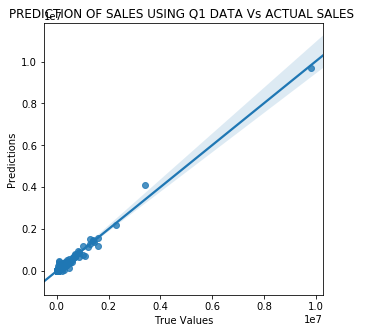

Score: 0.984440332414


In [625]:
sns.regplot(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("PREDICTION OF SALES USING Q1 DATA Vs ACTUAL SALES ")
plt.show()

print("Score:", model.score(X_test, y_test))

### OK SO OUR R^2 = 0.984. Let us improve on the score by some cross validation. Is our model over-fitted?

In [626]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [627]:
# FIND BEST CROSS VALIDATION

mean_score = []

for i in range(4,12):
    scores = cross_val_score(linearmodel, X_train, y_train, cv=i)
    predictions = cross_val_predict(linearmodel, X, y, cv=i)
    accuracy = metrics.r2_score(y, predictions)
    mean_score.append(accuracy)

    
# TO GET MAX VALUE OF LIST PYTHONIC WAY. -- https://stackoverflow.com/questions/6193498/pythonic-way-to-find-maximum-value-and-its-index-in-a-list
import operator
index, value = max(enumerate(mean_score), key=operator.itemgetter(1))

print("The Optimum # of Folds is " + str(index+4) + " & the optimum R^2 value after cross validation is " + str(value))

The Optimum # of Folds is 4 & the optimum R^2 value after cross validation is 0.971958074166


### TIME TO GET RID OF UNNECESSARY COEFFICIENTS AND MAKE A BETTER MODEL WITH REGULARIZATION

### WE WILL TRY LASSO REGRESSION HERE. FIND THE BEST ALPHA FIRST

In [733]:
# select the best alpha with LassoCV
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=10, normalize=True, random_state=42)
modelX = lassoregcv.fit(X_train, y_train)

print(lassoregcv.alpha_)

704.268202263


In [734]:

# predict method uses the best alpha value
y_pred = lassoregcv.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", modelX.score(X_test, y_test))

print(lassoregcv.coef_)

80100.8697876
Score: 0.984355366463
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   4.00412214e+00   2.71565894e+01   4.38244688e-14
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00]


In [735]:
def coeff_list(coef_,X):

    """FUNCTION TO PRINT VARIABLE & COEFF_ IN A DATAFRAME"""
    coeffs = pd.DataFrame(coef_)
    column_list = pd.DataFrame(X.dtypes.index)
    coeff_list = pd.concat([coeffs, column_list], axis = 1)

    coeff_list.columns = ["Coefficient", "Variable"]
    return coeff_list

In [736]:
lasso_coeff_list = coeff_list(lassoregcv.coef_, X)
lasso_coeff_list[(lasso_coeff_list["Coefficient"]!=0)]

,Coefficient,Variable
9,4.004122e+00,Total_Sale$
10,2.715659e+01,Number of Categories
11,4.382447e-14,Number of Vendors


### WE WILL TRY RIDGE REGRESSION HERE. FIND THE BEST ALPHA FIRST

In [704]:
import numpy as np
alpha_range = 10.**np.arange(-4, 4)
alpha_range

array([  1.00000000e-04,   1.00000000e-03,   1.00000000e-02,
         1.00000000e-01,   1.00000000e+00,   1.00000000e+01,
         1.00000000e+02,   1.00000000e+03])

In [705]:
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
modeltest=ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

0.001

In [706]:
y_pred = ridgeregcv.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", modeltest.score(X_test, y_test))

print(ridgeregcv.coef_)

78863.117198
Score: 0.984835125894
[  0.00000000e+00   5.98645255e+01   3.54118301e+00  -2.40701831e+00
  -7.20995034e+02   3.66826855e+02  -1.30053149e+01   3.46170083e+02
  -4.44091468e+00   4.22278158e+00   2.17790006e+01   2.17790006e+01
   2.17790006e+01  -9.32249270e+01   1.66812046e-02  -2.90821064e-01
   4.14074624e-01]


In [707]:
ridge_coeff_list = coeff_list(ridgeregcv.coef_, X)
ridge_coeff_list[(ridge_coeff_list["Coefficient"]!=0)]

,Coefficient,Variable
1,59.864525,Bottle_Max$
2,3.541183,Bottle_MaxSale$
3,-2.407018,Profit_MaxSale$
4,-720.995034,Avg_#Bottle_Sold
5,366.826855,Bottle_AvgPrice$
6,-13.005315,Bottle_AvgSale$
7,346.170083,Profit_AvgSale$
8,-4.440915,Total_Bottles_Sold
9,4.222782,Total_Sale$
10,21.779001,Number of Categories


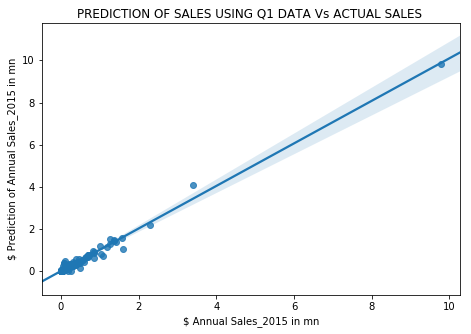

Score: 0.984440332414


In [708]:
# Plot of Y Vs Y_pred

rcParams['figure.figsize'] = 7.5, 5

eta = 10**(6)
y_test2 = y_test/eta
y_pred2 = y_pred/eta

sns.regplot(y_test2, y_pred2)
plt.xlabel("$ Annual Sales_2015 in mn")
plt.ylabel("$ Prediction of Annual Sales_2015 in mn")
plt.title("PREDICTION OF SALES USING Q1 DATA Vs ACTUAL SALES ")
plt.show()

print("Score:", model.score(X_test, y_test))

## CONCLUSION: USE LASSO REGRESSION -- SIMPLER MODEL

### LET US MAKE SOME PREDICTIONS USING 2016 DATA

In [709]:
## Let us collect the 2016 data here.
master_2016 = sales_popinc[(sales_popinc["Year"]=="2016")]

total_sales_2016 = total_annual_sales[(total_annual_sales["Year"]=="2016")]

master_sales_2016 = pd.merge(total_sales_2016, sales_popinc, how = "left", on = ["Store Number", "Year"])

master_sales_2016 = master_sales_2016.drop("TotalAnnual_$", axis= 1)

In [710]:
master_sales_2016

,Store Number,Year,Quarter,Bottle_Max$,Bottle_MaxSale$,Profit_MaxSale$,Avg_#Bottle_Sold,Bottle_AvgPrice$,Bottle_AvgSale$,Profit_AvgSale$,...,Number of Vendors,Number of Items,Zip Code,CityName,CountyName,# of Stores_City,County_Pop,County_XY,Median_IncomeHH,Mean_IncomeHH
0,2106,2016,1,225.57,2797.20,932.40,19.216789,15.715460,275.017775,91.722722,...,1227,1227,50613,CEDAR FALLS,BLACK HAWK,17,133455,"(42.4700957, -92.3088197)",55808.0,73216.0
1,2113,2016,1,44.51,337.56,112.56,4.350384,15.859668,55.404936,18.505524,...,391,391,50543,GOWRIE,WEBSTER,2,37071,"(42.4279662, -94.1817881)",43250.0,53634.0
2,2130,2016,1,74.96,13233.60,4411.20,19.136760,15.134627,294.838691,98.329379,...,1031,1031,50703,WATERLOO,BLACK HAWK,46,133455,"(42.4700957, -92.3088197)",41933.0,53120.0
3,2152,2016,1,33.75,330.84,110.28,3.435780,14.155734,42.696101,14.315505,...,218,218,50469,ROCKWELL,CERRO GORDO,1,43017,"(43.0815577, -93.2608184)",53421.0,60890.0
4,2178,2016,1,71.66,1052.46,351.00,7.579564,15.482948,98.407102,32.890536,...,597,597,52172,WAUKON,ALLAMAKEE,3,13886,"(43.2842838, -91.3780923)",39417.0,53200.0
5,2190,2016,1,1090.22,6228.00,2076.00,7.948153,19.199916,104.014715,34.697142,...,3086,3086,50314,DES MOINES,POLK,90,467711,"(41.6855048, -93.5735335)",46290.0,60096.0
6,2191,2016,1,195.00,16542.00,5514.00,12.690217,17.089993,203.879158,67.991026,...,1472,1472,52632,KEOKUK,LEE,7,35089,"(40.6419764, -91.479264)",33608.0,44785.0
7,2200,2016,1,87.00,564.48,188.28,4.133262,17.283699,58.765235,19.658262,...,938,938,50583,SAC CITY,SAC,2,10021,"(42.3862604, -95.1053946)",45528.0,55310.0
8,2228,2016,1,104.87,470.40,156.90,5.502994,15.040853,63.412859,21.194102,...,668,668,50273,WINTERSET,MADISON,5,15753,"(41.3307142, -94.0155619)",41289.0,53533.0
9,2233,2016,1,106.56,846.24,282.24,8.554393,18.798368,116.807803,39.008075,...,478,478,51360,SPIRIT LAKE,DICKINSON,6,17111,"(43.3779848, -95.1508301)",56485.0,66441.0


### USING .PREDICT(LASSOREGCV), WE PREDICT 2016 SALES.

In [711]:
X_2016_test = master_sales_2016[pred_columns]

X_2016_test = sm.add_constant(X_2016_test)

X_2016_test.shape

y_2016_pred = lassoregcv.predict(X_2016_test)

storepred_2016 = pd.DataFrame(y_2016_pred)

In [712]:
## Let us combine store number with store predictions

forecast_2016 = master_sales_2016[["Store Number", "CityName", "CountyName", "Zip Code"]]
forecast_2016 = pd.concat([forecast_2016, storepred_2016], axis=1)
forecast_2016.columns = ["Store Number", "CityName", "CountyName", "Zip Code", "2016_ForecastSales$"]
forecast_2016["2016_ForecastSales$"] = forecast_2016["2016_ForecastSales$"].apply(lambda x: round(x,2))

forecast_2016[(forecast_2016["Store Number"]==5205)]

,Store Number,CityName,CountyName,Zip Code,2016_ForecastSales$
1264,5205,GLIDDEN,CARROLL,51443,26026.39


### MAKING A DATAFRAME WITH 2015 STORE SALES & 2016 STORE PREDICTIONS FOR SEABORN

In [713]:
columns_2015 = ["Store Number", "TotalAnnual_$", "Zip Code", "CityName" ,"CountyName"]
pastsales_2015 = master_sales_q1_2015[columns_2015]

pastsales_2015[(pastsales_2015["Store Number"]==4415)]

,Store Number,TotalAnnual_$,Zip Code,CityName,CountyName
2530,4415,33202.3,50601,ACKLEY,HARDIN


### COMPARING 2015 & 2016 SALES HERE

In [714]:
past_forecast = pd.merge(pastsales_2015, forecast_2016, on=["Store Number", "Zip Code", "CityName", "CountyName"] , how = "outer", )
past_forecast[(past_forecast["Store Number"]==4415)]
past_forecast["2015_PastSales$"] = past_forecast["TotalAnnual_$"] 
past_forecast.drop(["TotalAnnual_$"], axis=1)

,Store Number,Zip Code,CityName,CountyName,2016_ForecastSales$,2015_PastSales$
0,2106,50613,CEDAR FALLS,BLACK HAWK,1408473.90,1433451.46
1,2113,50543,GOWRIE,WEBSTER,106220.22,85763.42
2,2130,50703,WATERLOO,BLACK HAWK,1275262.00,1107685.25
3,2152,50469,ROCKWELL,CERRO GORDO,50462.41,72080.36
4,2178,52172,WAUKON,ALLAMAKEE,263245.10,277987.96
5,2190,50314,DES MOINES,POLK,1409577.86,1226205.17
6,2191,52632,KEOKUK,LEE,1277658.33,1275405.26
7,2200,50583,SAC CITY,SAC,260106.30,223899.24
8,2205,51632,CLARINDA,PAGE,NaN,230898.31
9,2228,50273,WINTERSET,MADISON,199271.04,188879.70


### DATA MANIPULATION! CREATE MORE COLUMNS TO UNDERSTAND RELATIONSHIPS

In [715]:
# CALCULATION SALES CHANGE FOR EACH STORE

past_forecast["RevenueChange"] = (past_forecast["2016_ForecastSales$"]) - (past_forecast["2015_PastSales$"])
past_forecast["%Change"] = round((past_forecast["RevenueChange"])/(past_forecast["2015_PastSales$"])*100,2)
past_forecast["State"] = "IOWA"

past_forecast

past_forecast[(past_forecast["Store Number"]==4415)]

past_forecast = past_forecast.drop("TotalAnnual_$", axis=1)

In [716]:
##### LET US LOOK @ STATE REVENUE HERE

past_forecast_total = past_forecast.groupby(["State"], as_index=False)["2016_ForecastSales$", "2015_PastSales$"].sum()

past_forecast_total["RevenueChange"] = (past_forecast_total["2016_ForecastSales$"]) - (past_forecast_total["2015_PastSales$"])
past_forecast_total["%Change"] = round((past_forecast_total["RevenueChange"])/(past_forecast_total["2015_PastSales$"])*100,2)

past_forecast_total

,State,2016_ForecastSales$,2015_PastSales$,RevenueChange,%Change
0,IOWA,2.798046e+08,2.748616e+08,4.943071e+06,1.8


In [717]:
# POSITIVE GROWTH STATES

past_forecast_positive = past_forecast[(past_forecast["%Change"]>0)]
past_forecast_negative = past_forecast[(past_forecast["%Change"]<0)]

past_forecast_positive["Store Number"].count()
#past_forecast_negative["Store Number"].count()

853

In [718]:
## TIME TO SEE SOME POSITIVE DATA

past_forecast_positive_store = past_forecast_positive.groupby(["CountyName", "CityName"],as_index=False)["Store Number"].count()
pos_storenumbers = pd.merge(past_forecast_positive_store, city_store, on = "CityName")

pos_storenumbers["% Positive Stores"] =  round(((pos_storenumbers["# of Stores_City"])-(pos_storenumbers["Store Number"]))/(pos_storenumbers["Store Number"]),2)

pos_storenumbers.loc[storenumbers['% Positive Stores'].idxmax()]

CountyName           JASPER
CityName             COLFAX
Store Number              2
# of Stores_City          2
% Positive Stores         0
Name: 146, dtype: object

In [719]:
storenumbers[storenumbers["CountyName"]=="IOWA"]

,CountyName,CityName,Store Number,# of Stores_City,% Positive Stores
146,IOWA,BETTENDORF,1,12,11.0
148,IOWA,GLADBROOK,1,1,0.0
149,IOWA,MARENGO,1,1,0.0
150,IOWA,STATE CENTER,1,2,1.0
151,IOWA,WILLIAMSBURG,2,2,0.0


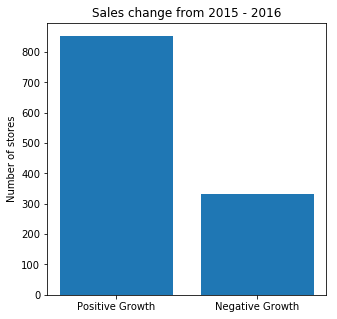

In [720]:
# Choose the height of the bars
rcParams['figure.figsize'] = 5, 5

height = [past_forecast_positive["Store Number"].count(), past_forecast_negative["Store Number"].count()]
 
# Choose the names of the bars
bars = ("Positive Growth", 'Negative Growth')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height, align='center', width=0.8)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.ylabel("Number of stores")
plt.title("Sales change from 2015 - 2016")
plt.show()

In [721]:
# To get the store with max increase in revenue from 2015-2016.

past_forecast.loc[past_forecast['RevenueChange'].idxmax()]


# Woops ... what is up with store 3973?

Store Number                  4829
Zip Code                     50314
CityName                DES MOINES
CountyName                    POLK
2016_ForecastSales$    9.48957e+06
2015_PastSales$        8.72389e+06
RevenueChange               765678
%Change                       8.78
State                         IOWA
Name: 1017, dtype: object

In [722]:
past_forecast.loc[past_forecast['RevenueChange'].idxmin()]

Store Number                      3814
Zip Code                         50266
CityName               WEST DES MOINES
CountyName                      DALLAS
2016_ForecastSales$        1.84064e+06
2015_PastSales$            2.89991e+06
RevenueChange             -1.05927e+06
%Change                         -36.53
State                             IOWA
Name: 314, dtype: object

In [723]:
sales_all[(sales_all["Store Number"]==4829)]

,Store Number,Year,Quarter,Bottle_Max$,Bottle_MaxSale$,Profit_MaxSale$,Avg_#Bottle_Sold,Bottle_AvgPrice$,Bottle_AvgSale$,Profit_AvgSale$,Total_Bottles_Sold,Total_Sale$,Number of Categories,Number of Vendors,Number of Items,Zip Code,CityName,CountyName
4970,4829,2015,1,2098.94,16110.0,5370.0,27.224862,19.445217,461.021864,153.813151,123737,2095344.37,4545,4545,4545,50314,DES MOINES,POLK
4971,4829,2015,2,224.99,16650.0,5550.0,28.630439,18.659481,476.085239,158.791453,136195,2264737.48,4757,4757,4757,50314,DES MOINES,POLK
4972,4829,2015,3,225.57,16542.0,5514.0,28.921136,18.354561,476.104418,158.785707,127253,2094859.44,4400,4400,4400,50314,DES MOINES,POLK
4973,4829,2015,4,202.88,13233.6,4411.2,29.643658,19.032465,508.505025,169.616833,132270,2268949.42,4462,4462,4462,50314,DES MOINES,POLK
4974,4829,2016,1,202.88,16542.0,5514.0,29.700066,18.708784,506.071398,168.769383,135759,2313252.36,4571,4571,4571,50314,DES MOINES,POLK


In [724]:
master_sales_2015.describe

<bound method NDFrame.describe of       Store Number  Year  TotalAnnual_$ Quarter  Bottle_Max$  Bottle_MaxSale$  \
0             2106  2015     1433451.46       4       202.88          3265.92   
1             2106  2015     1433451.46       3       195.00          4069.80   
2             2106  2015     1433451.46       2       224.99          3627.36   
3             2106  2015     1433451.46       1       172.94          2961.84   
4             2113  2015       85763.42       1        56.88           333.00   
5             2113  2015       85763.42       3        50.40           333.00   
6             2113  2015       85763.42       2        50.40           423.12   
7             2113  2015       85763.42       4        42.72           423.12   
8             2130  2015     1107685.25       1       147.15         12888.00   
9             2130  2015     1107685.25       2        82.49         13233.60   
10            2130  2015     1107685.25       3        93.72         13233.